<font size="4"> **Name : Vinay Nagaraj<br>
Class : DSC530-T301<br>
Assignment : Term project that takes you through an exploratory data analysis project.**</font>

In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt        # plotting
import thinkplot
import os                              # accessing directory structure
import thinkstats2
import hypothesis
import statsmodels.formula.api as smf

**Read FIFA_data.csv file**

In [76]:
df_fifa2019 = pd.read_csv("FIFA_data.csv")
fifa2019 = df_fifa2019.copy()

In [77]:
fifa2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18206 non-null  int64  
 1   ID                        18206 non-null  int64  
 2   Name                      18206 non-null  object 
 3   Age                       18206 non-null  int64  
 4   Photo                     18206 non-null  object 
 5   Nationality               18206 non-null  object 
 6   Flag                      18206 non-null  object 
 7   Overall                   18206 non-null  int64  
 8   Potential                 18206 non-null  int64  
 9   Club                      17965 non-null  object 
 10  Club Logo                 18206 non-null  object 
 11  Value                     18206 non-null  object 
 12  Wage                      18206 non-null  object 
 13  Special                   18206 non-null  int64  
 14  Prefer

In [78]:
fifa2019.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [79]:
fifa2019.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

**Data Cleaning:**

In [80]:
fifa2019.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000,18158.000000,18158.000000,18158.000000,18146.000000,...,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000
mean,9102.500000,214296.582555,25.122707,66.239811,71.307591,1597.825113,1.113228,2.947296,2.361328,19.545354,...,48.549455,58.649135,47.282024,47.698095,45.661196,16.616588,16.391673,16.232460,16.389140,16.711312
std,5255.763836,29965.130308,4.669582,6.907491,6.136538,272.585782,0.394041,0.660474,0.756180,15.947892,...,15.704062,11.435858,19.904872,21.664572,21.289697,17.695768,16.907363,16.503232,17.035107,17.955522
min,0.000000,16.000000,16.000000,47.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.250000,200315.250000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9102.500000,221757.500000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13653.750000,236528.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18205.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [81]:
# Count the NaN values in a column
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['% Total Missing Values'] = 100 * mz_table['Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 50), "columns having greater than 50% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 40), "columns having greater than 40% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 30), "columns having greater than 30% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 20), "columns having greater than 20% missing value.")
        print ("There are ", sum(mz_table['% Total Missing Values'] > 10), "columns having greater than 10% missing value.")

        return mz_table

In [82]:
fifa2019_null = missing_zero_values_table(fifa2019)

Your selected dataframe has 89 columns and 18206 Rows.
There are 76 columns that have missing values.
There are  1 columns having greater than 50% missing value.
There are  1 columns having greater than 40% missing value.
There are  1 columns having greater than 30% missing value.
There are  1 columns having greater than 20% missing value.
There are  27 columns having greater than 10% missing value.


In [83]:
# Replace the missing values in columns Club and Position to values 'No Club' and 'ST' (striker) respectively
fifa2019['Club'].fillna('No Club', inplace = True)
fifa2019['Position'].fillna('ST', inplace = True)

In [84]:
# Select the columns for which we would like to replace the missing values with its mean
to_replace_by_mean = fifa2019.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [85]:
# replacing the missing values with mean
for i in to_replace_by_mean.columns:
    fifa2019[i].fillna(fifa2019[i].mean(), inplace = True)

In [86]:
# Replace the missing values of the categorical variables with the mode
to_replace_by_mode = fifa2019.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in to_replace_by_mode.columns:
    fifa2019[i].fillna(fifa2019[i].mode()[0], inplace = True)

In [87]:
# Replace the missing values of discrete numerical or continuous numerical variables by its median
to_replace_by_median = fifa2019.loc[:, ['Weak Foot', 'Skill Moves', ]]
for i in to_replace_by_median.columns:
    fifa2019[i].fillna(fifa2019[i].median(), inplace = True)

In [88]:
# Replace the missing values of the remaning columns with the value zero
fifa2019.columns[fifa2019.isna().any()]
fifa2019.fillna(0, inplace = True)

In [89]:
fifa2019.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [90]:
fifa2019_null = missing_zero_values_table(fifa2019)

Your selected dataframe has 89 columns and 18206 Rows.
There are 0 columns that have missing values.
There are  0 columns having greater than 50% missing value.
There are  0 columns having greater than 40% missing value.
There are  0 columns having greater than 30% missing value.
There are  0 columns having greater than 20% missing value.
There are  0 columns having greater than 10% missing value.


Now as you can see, we have a clean data on which we can start our analysis

## Start of Assignment Tasks - 10.4 : Term Project

**1) A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).**

In [91]:
# Below are functions to get the rounded values from different columns.
# This will help us create a new dataframe which will contain columns which would be more meaningful & helpful for our analysis.
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [92]:
# add the above defined new columns to the fifa2019 dataframe
fifa2019['Defending'] = fifa2019.apply(defending, axis = 1)
fifa2019['General'] = fifa2019.apply(general, axis = 1)
fifa2019['Shooting'] = fifa2019.apply(shooting, axis = 1)

In [93]:
# create the new dataframe fifa2019_df with the below columns and rename column 'Preferred Foot' to 'Preferred_Foot' for use in Histogram and other places
fifa2019_df = fifa2019[['Name', 'Age', 'Nationality', 'Preferred Foot', 'Work Rate', 
                    'Position', 'Height', 'Weight', 'Defending', 'General', 'Shooting', 'Club']]
fifa2019_df = fifa2019_df.rename(columns={'Preferred Foot': 'Preferred_Foot'})

In [94]:
fifa2019_df.head()

,Name,Age,Nationality,Preferred_Foot,Work Rate,Position,Height,Weight,Defending,General,Shooting,Club
0,L. Messi,31,Argentina,Left,Medium/ Medium,RF,5'7,159lbs,29,89,88,FC Barcelona
1,Cristiano Ronaldo,33,Portugal,Right,High/ Low,ST,6'2,183lbs,27,88,88,Juventus
2,Neymar Jr,26,Brazil,Right,High/ Medium,LW,5'9,150lbs,28,85,84,Paris Saint-Germain
3,De Gea,27,Spain,Right,Medium/ Medium,GK,6'4,168lbs,16,26,21,Manchester United
4,K. De Bruyne,27,Belgium,Right,High/ High,RCM,5'11,154lbs,59,79,85,Manchester City


**2) Describe what the 5 variables mean in the dataset (Chapter 1).**

In [95]:
# Below is the variable mean of all the numeric columns in the fifa2019_df dataframe
fifa2019_df.describe()

,Age,Defending,General,Shooting
count,18206.000000,18206.000000,18206.000000,18206.000000
mean,25.122707,46.881138,53.304570,47.074206
std,4.669582,20.409858,15.774409,16.363981
min,16.000000,5.000000,8.000000,7.000000
25%,21.000000,28.000000,49.000000,36.000000
50%,25.000000,53.000000,57.000000,50.000000
75%,28.000000,64.000000,63.000000,59.000000
max,45.000000,92.000000,89.000000,88.000000


**3) Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).**

In [96]:
def plot_hist(var):
    hist = thinkstats2.Hist(var)
    thinkplot.Hist(hist,align='left')
    
    return hist

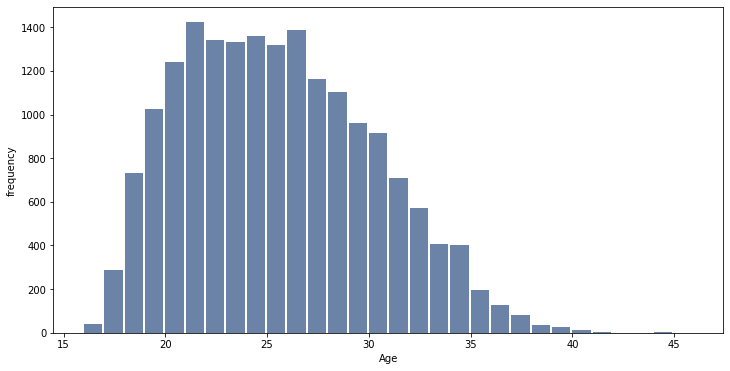

<Figure size 576x432 with 0 Axes>

In [97]:
# Plot histogram of Age
plt.rcParams['figure.figsize'] = (12,6)
hist = plot_hist(fifa2019_df.Age)
thinkplot.Show(xlabel='Age', ylabel='frequency')

In [98]:
# Looking into above histogram, it appears to have possibility of outliers with a few players around the age of 40yrs or more.
# Check largest 6 values
hist.Largest(6)

[(45, 1), (44, 2), (42, 1), (41, 5), (40, 13), (39, 25)]

In [99]:
#Check smallest 6 values
hist.Smallest(6)

[(16, 41), (17, 289), (18, 732), (19, 1024), (20, 1240), (21, 1423)]

In [100]:
# We can see 1 player at the age of 45, 2 players at 44yrs, 1 player at 42yrs and 5 players at 41yrs.
# We can take a look at those records to verify if we have plotted our histogram correctly.
Age_df = fifa2019_df.loc[fifa2019_df['Age'] > 40]
Age_df.sort_values(by=['Age'], ascending=False)

,Name,Age,Nationality,Preferred_Foot,Work Rate,Position,Height,Weight,Defending,General,Shooting,Club
4741,O. Pérez,45,Mexico,Right,Medium/ Medium,GK,5'8,165lbs,15,18,19,Pachuca
17726,T. Warner,44,Trinidad & Tobago,Right,Medium/ Medium,GK,6'4,185lbs,16,18,19,Accrington Stanley
18183,K. Pilkington,44,England,Right,Medium/ Medium,GK,6'2,190lbs,14,13,16,Cambridge United
10545,S. Narazaki,42,Japan,Right,Medium/ Medium,GK,6'2,176lbs,24,26,23,Nagoya Grampus
1120,J. Villar,41,Paraguay,Right,Medium/ Medium,GK,5'11,187lbs,13,18,18,No Club
4228,B. Nivet,41,France,Right,Medium/ Medium,CAM,5'10,165lbs,52,69,72,ESTAC Troyes
7225,C. Muñoz,41,Argentina,Right,Medium/ Medium,GK,5'10,161lbs,17,21,19,CD Universidad de Concepción
12192,H. Sulaimani,41,Saudi Arabia,Left,High/ Medium,LB,5'8,154lbs,64,64,57,Ohod Club
15426,M. Tyler,41,England,Right,Medium/ Medium,GK,6'0,183lbs,19,19,13,Peterborough United


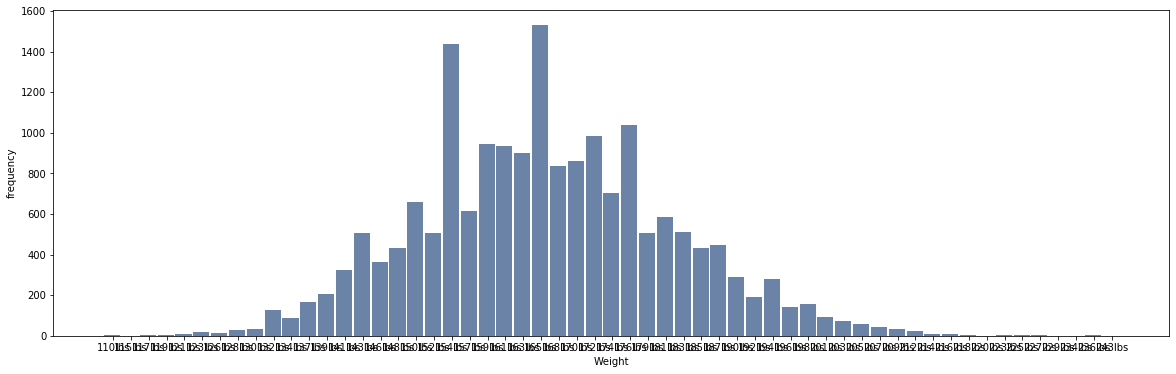

<Figure size 576x432 with 0 Axes>

In [101]:
# Plot histogram of Weight
plt.rcParams['figure.figsize'] = (20,6)
hist = plot_hist(fifa2019_df.Weight)
thinkplot.Show(xlabel='Weight', ylabel='frequency')

In [102]:
hist.Largest(10)

[('243lbs', 1),
 ('236lbs', 2),
 ('234lbs', 1),
 ('229lbs', 1),
 ('227lbs', 2),
 ('225lbs', 3),
 ('223lbs', 3),
 ('220lbs', 1),
 ('218lbs', 5),
 ('216lbs', 9)]

In [103]:
hist.Smallest(10)

[('110lbs', 2),
 ('115lbs', 1),
 ('117lbs', 6),
 ('119lbs', 4),
 ('121lbs', 10),
 ('123lbs', 18),
 ('126lbs', 14),
 ('128lbs', 31),
 ('130lbs', 33),
 ('132lbs', 127)]

From the above histogram, we can see that we have a few outliers in weight column. We can see a few players above 215lbs & also a few players below 120lbs

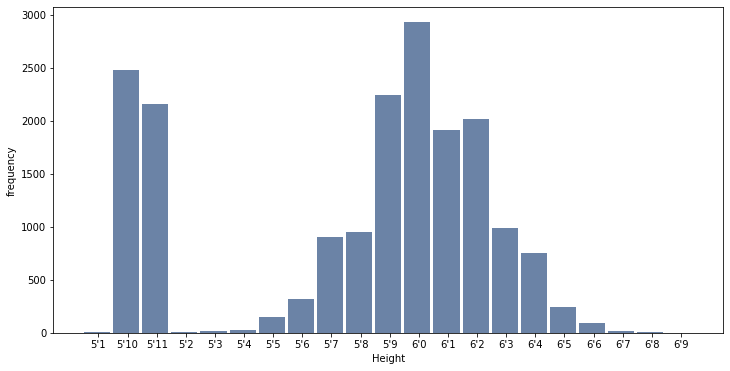

<Figure size 576x432 with 0 Axes>

In [104]:
# Plot histogram of Height
plt.rcParams['figure.figsize'] = (12,6)
hist = plot_hist(fifa2019_df.Height)
thinkplot.Show(xlabel='Height', ylabel='frequency')

In [105]:
hist.Largest(2)

[("6'9", 2), ("6'8", 10)]

In [106]:
hist.Smallest(2)

[("5'1", 3), ("5'10", 2478)]

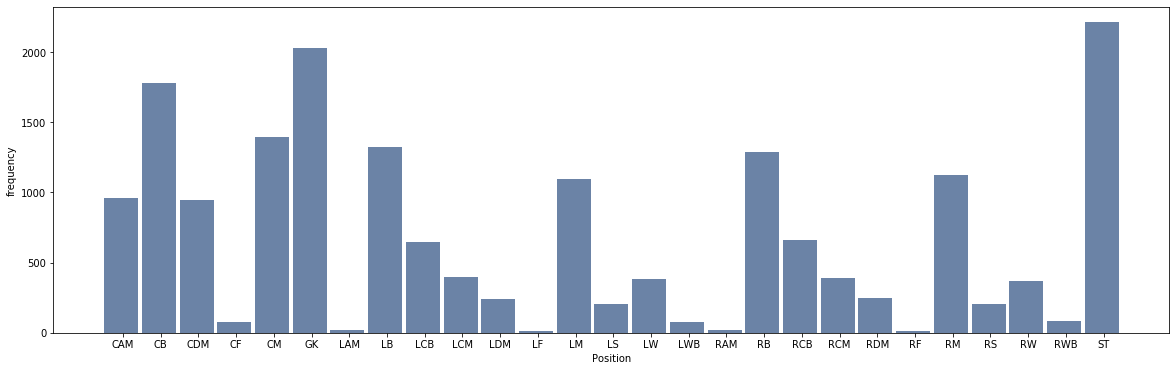

<Figure size 576x432 with 0 Axes>

In [107]:
# Plot histogram of Position
USWines_DF1 = cleanDF[(cleanDF["country"] == "US") & (cleanDF["price"] < 250)]
plt.rcParams['figure.figsize'] = (20,6)
hist = plot_hist(fifa2019_df.Position)
thinkplot.Show(xlabel='Position', ylabel='frequency')

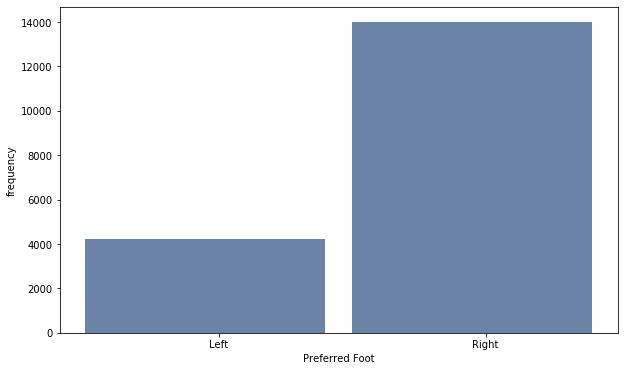

<Figure size 576x432 with 0 Axes>

In [108]:
# Plot histogram of Preferred Foot
plt.rcParams['figure.figsize'] = (10,6)
hist = plot_hist(fifa2019_df.Preferred_Foot)
thinkplot.Show(xlabel='Preferred Foot', ylabel='frequency')

In [109]:
hist.Smallest(1)

[('Left', 4211)]

In [110]:
hist.Largest(1)

[('Right', 13995)]

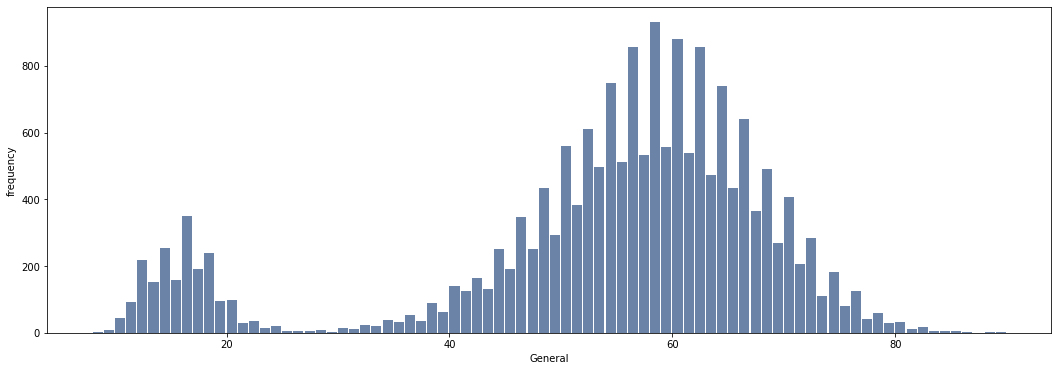

<Figure size 576x432 with 0 Axes>

In [111]:
# Plot histogram of General ability of Heading Accuracy, Dribbling, Curve or BallControl
plt.rcParams['figure.figsize'] = (18,6)
hist = plot_hist(fifa2019_df.General)
thinkplot.Show(xlabel='General', ylabel='frequency')

**4) Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).**

Let us try to calculate the Mean, Mode, Spread, and Tails on column 'Age' from our dataframe.

In [112]:
print('Mean of Age = ', fifa2019_df.Age.mean())

Mean of Age =  25.12270679995606


In [113]:
def Mode(hist):
    """Returns the value with the highest frequency.

    hist: Hist object

    returns: value from Hist
    """
    p, x = max([(p, x) for x, p in hist.Items()])
    return x

In [114]:
hist = thinkstats2.Hist(fifa2019_df.Age)
mode = Mode(hist)
print('Mode of Age =', mode)

Mode of Age = 21


In [115]:
#We can also get the mode of a column by using the mode() function
print('Mode of Age = ', fifa2019_df.Age.mode())

Mode of Age =  0    21
dtype: int64


In [116]:
# As per above Mode calculation it tells us the most common (frequent) Age of players is 21. Let us see how many player's age = 21.
print(Age_df.shape[0])  # gives number of row count

9


We have 1,423 players who are 21yrs old.

In [117]:
import sys
from operator import itemgetter
def AllModes(hist):
    """Returns value-freq pairs in decreasing order of frequency.

    hist: Hist object

    returns: iterator of value-freq pairs
    """
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)

In [118]:
hist = thinkstats2.Hist(fifa2019_df.Age)
mode = AllModes(hist)
print(mode)

[(21, 1423), (26, 1387), (24, 1358), (22, 1340), (23, 1332), (25, 1319), (20, 1240), (27, 1162), (28, 1101), (19, 1024), (29, 959), (30, 917), (18, 732), (31, 707), (32, 574), (33, 408), (34, 404), (17, 289), (35, 196), (36, 127), (37, 82), (16, 41), (38, 37), (39, 25), (40, 13), (41, 5), (44, 2), (42, 1), (45, 1)]


In [119]:
print('Spread of Age = ', fifa2019_df.Age.var())

Spread of Age =  21.804991651135392


In [120]:
print('Standard deviation of Age = ', fifa2019_df.Age.std())

Standard deviation of Age =  4.6695815284814755


The Mean of Age is 25.12 yrs and the standard deviation is 4.67 yrs, which means we should expect deviations of 4-5 yrs to be common.

**5) Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario.  Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).**

In [121]:
# Below PMFs & CDFs will help us answer our question in general who has been better in defending the ball & who has been better in shooting the ball.
Right = fifa2019_df[fifa2019_df.Preferred_Foot == 'Right']
Left = fifa2019_df[fifa2019_df.Preferred_Foot == 'Left']

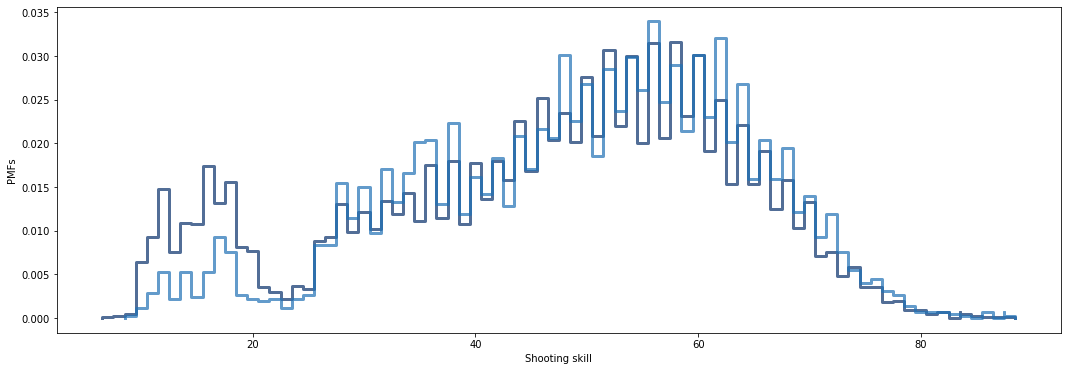

In [122]:
# Here we will see the PMF for Shooting
shoot_right_pmf = thinkstats2.Pmf(Right.Shooting, label = 'Right foot')
shoot_left_pmf = thinkstats2.Pmf(Left.Shooting, label = 'Left foot')

thinkplot.Pmfs([shoot_right_pmf, shoot_left_pmf])
thinkplot.Config(xlabel='Shooting skill', ylabel='PMFs')

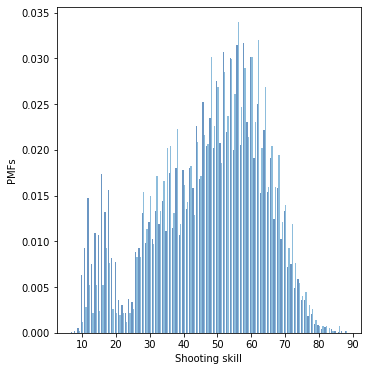

In [123]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(shoot_right_pmf, align='right', width=0.4)
thinkplot.Hist(shoot_left_pmf, align='left', width=0.4)
thinkplot.config(xlabel='Shooting skill', ylabel='PMFs')

Above we show the Shooting skill PMFs for Right foot and Left foot players using step functions and bar graphs.

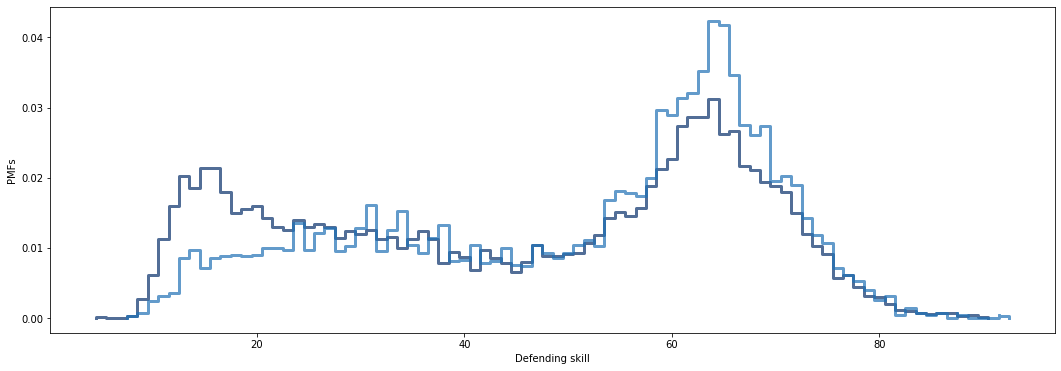

In [124]:
# Here we will see the PMF for Defending
defend_right_pmf = thinkstats2.Pmf(Right.Defending, label = 'Right foot')
defend_left_pmf = thinkstats2.Pmf(Left.Defending, label = 'Left foot')

thinkplot.Pmfs([defend_right_pmf, defend_left_pmf])
thinkplot.Config(xlabel='Defending skill', ylabel='PMFs')

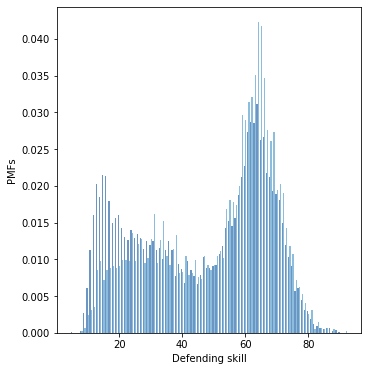

In [125]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(defend_right_pmf, align='right', width=0.4)
thinkplot.Hist(defend_left_pmf, align='left', width=0.4)
thinkplot.config(xlabel='Defending skill', ylabel='PMFs')

Above we show the Defending skill PMFs for Right foot and Left foot players using step functions and bar graphs.

**6) Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).**

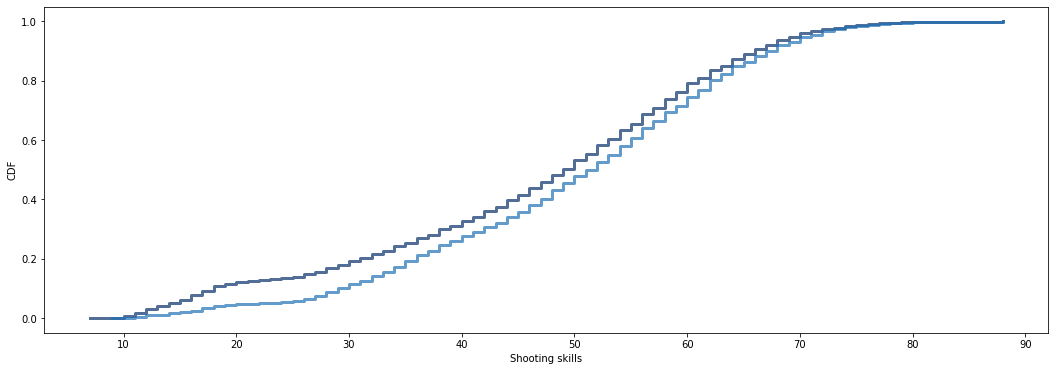

In [126]:
# Like we did above with Shooting & Defending, we will plot CDF too.
shoot_right_cdf = thinkstats2.Cdf(Right.Shooting, label = 'Right foot')
shoot_left_cdf = thinkstats2.Cdf(Left.Shooting, label = 'Left foot')
thinkplot.Cdfs([shoot_right_cdf, shoot_left_cdf])
thinkplot.Config(xlabel = 'Shooting skills', ylabel = 'CDF')

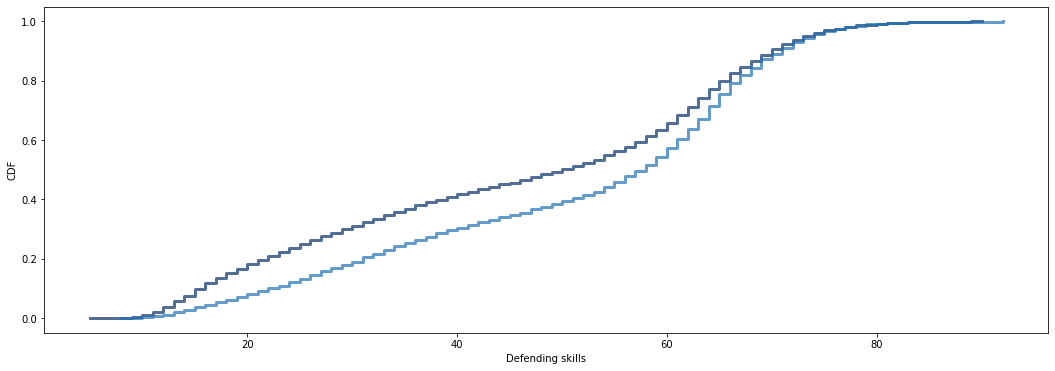

In [127]:
defend_right_cdf = thinkstats2.Cdf(Right.Defending, label = 'Right foot')
defend_left_cdf = thinkstats2.Cdf(Left.Defending, label = 'Left foot')
thinkplot.Cdfs([defend_right_cdf, defend_left_cdf])
thinkplot.Config(xlabel = 'Defending skills', ylabel = 'CDF')

The above two CDF plots makes the shape of the distributions and the differences much clearer between the Right foot & Left foot players.  We can see that Left foot players are slightly better at both Defending and Shooting than the Right foot players.

**7) Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).**

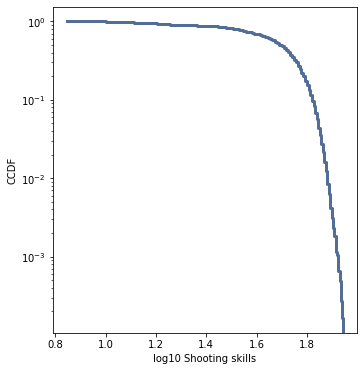

In [128]:
# Pareto Distribution on Shooting skills
log_shoot = np.log10(fifa2019_df.Shooting)
cdf_shoot = thinkstats2.Cdf(fifa2019_df.Shooting, label='data')
cdf_shoot_log = thinkstats2.Cdf(log_shoot, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=550, alpha=1.1, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')
thinkplot.PrePlot(cols=2)
thinkplot.Cdf(cdf_shoot_log, complement=True) 
thinkplot.Config(xlabel='log10 Shooting skills',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

The above plot shows complementry CDF of Shooting skills on a log-log scale

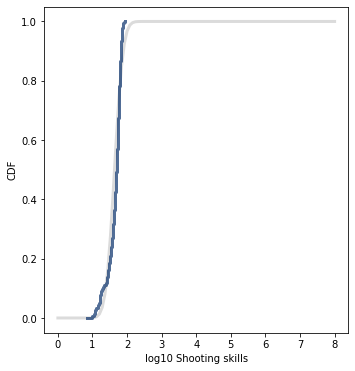

In [129]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_shoot.mean(), log_shoot.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_shoot_log) 
thinkplot.Config(xlabel='log10 Shooting skills',
                 ylabel='CDF', loc='lower right')

Here's a normal probability plot for the log-populations.

**8) Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).**

In [130]:
fifa2019_df.corr(method='pearson')

,Age,Defending,General,Shooting
Age,1.000000,0.124181,0.107179,0.153516
Defending,0.124181,1.000000,0.441250,0.156229
General,0.107179,0.441250,1.000000,0.896116
Shooting,0.153516,0.156229,0.896116,1.000000


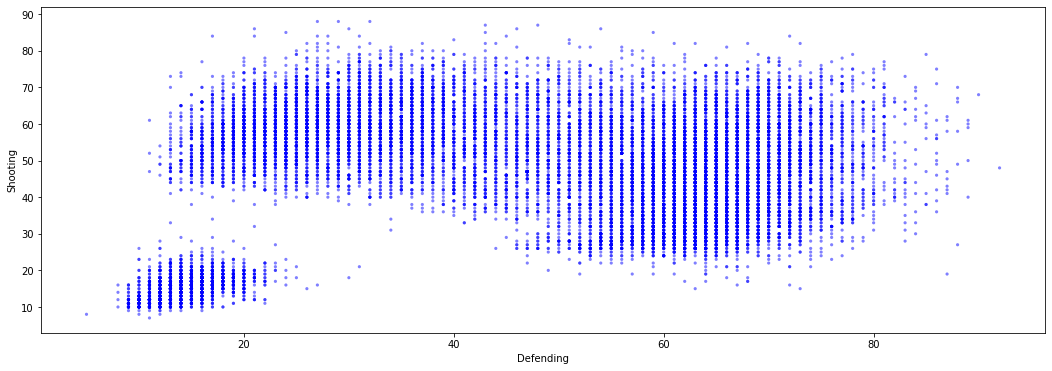

In [131]:
# Scatter Plot between Defending and Shooting

thinkplot.Scatter(fifa2019_df.Defending, fifa2019_df.Shooting, alpha=0.5, s=10)
thinkplot.Config(xlabel='Defending',
                 ylabel='Shooting',
                 legend=False)

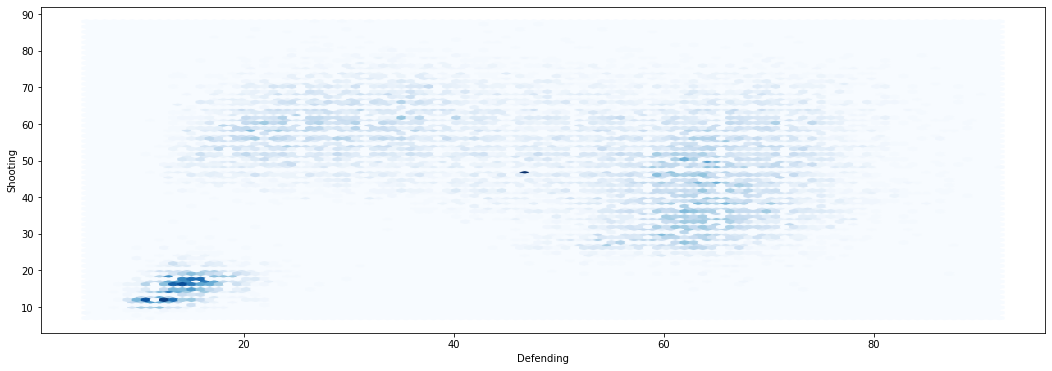

In [132]:
# An alternative to a scatter plot is something like a HexBin plot, which breaks the plane into bins, 
# counts the number of respondents in each bin, and colors each bin in proportion to its count.

thinkplot.HexBin(fifa2019_df.Defending, fifa2019_df.Shooting)
thinkplot.Config(xlabel='Defending',
                 ylabel='Shooting',
                 legend=False)

In [133]:
# Calculate Covariance
np.cov(fifa2019_df.Defending, fifa2019_df.Shooting)

array([[416.56230611,  52.17827973],
       [ 52.17827973, 267.77988175]])

Covariance between expense Defending and Shooting is 52.18

In [134]:
# Calculate pearson correlation
np.corrcoef(fifa2019_df.Defending, fifa2019_df.Shooting)

array([[1.        , 0.15622869],
       [0.15622869, 1.        ]])

Pearson correlation between Defending and Shooting is 0.156

In [135]:
# Calculate Spearman's correlation
# Calculate rank of each variable
fifa2019_df['Defending_r'] = fifa2019_df.Defending.rank()
fifa2019_df['Shooting_r'] = fifa2019_df.Shooting.rank()
np.corrcoef(fifa2019_df.Defending_r, fifa2019_df.Shooting_r)

array([[1.       , 0.0459213],
       [0.0459213, 1.       ]])

Spearman's rank correlation between Defending and Shooting is 0.046

**9) Conduct a test on your hypothesis using one of the methods covered in Chapter 9.**

In [136]:
# Testing the difference in mean between Right foot Shooting & Left foot Shooting

data_s = Right.Shooting, Left.Shooting
ht_s = hypothesis.DiffMeansPermute(data_s) # difference in means by permutation
p1_s = ht_s.PValue(iters=10000)                       # Get the p-value
p1_s

0.0

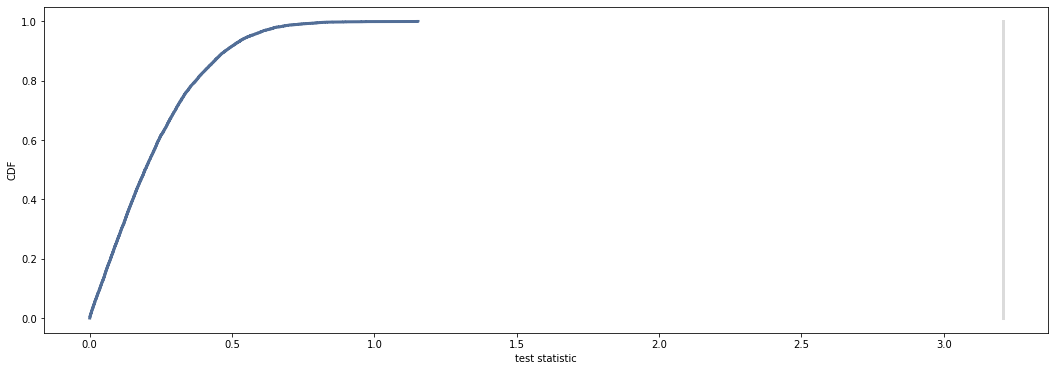

<Figure size 576x432 with 0 Axes>

In [137]:
ht_s.PlotCdf()
thinkplot.Show(xlabel='test statistic',
               ylabel='CDF')

In [138]:
# Testing the difference in mean between Right foot Defending & Left foot Defending

data_d = Right.Defending, Left.Defending
ht_d = hypothesis.DiffMeansPermute(data_d) # difference in means by permutation
p1_d = ht_d.PValue(iters=10000)                       # Get the p-value
p1_d

0.0

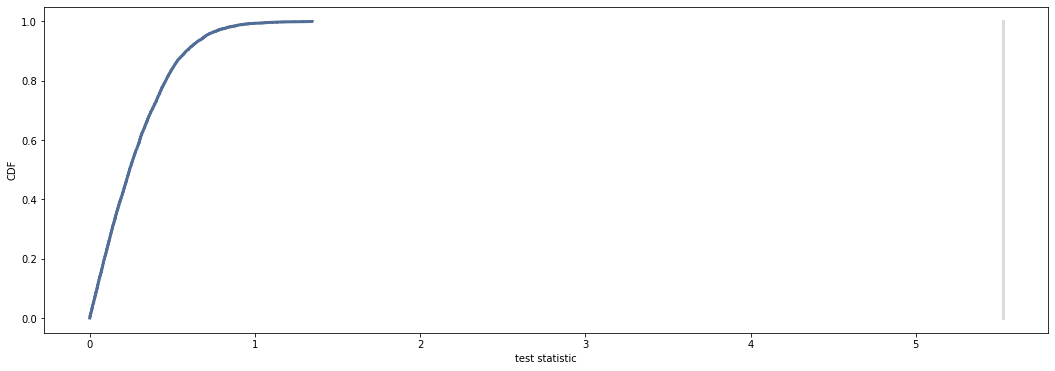

<Figure size 576x432 with 0 Axes>

In [139]:
ht_d.PlotCdf()
thinkplot.Show(xlabel='test statistic',
               ylabel='CDF')

**10) For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).**

In [140]:
# Here we choose Age as dependent and Defending & Shooting as explanatory variable.

formula = 'Age ~ Defending + Shooting'
model = smf.ols(formula, data=fifa2019_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     319.0
Date:                Sat, 08 Aug 2020   Prob (F-statistic):          7.10e-137
Time:                        12:39:30   Log-Likelihood:                -53576.
No. Observations:               18206   AIC:                         1.072e+05
Df Residuals:                   18203   BIC:                         1.072e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.1745      0.122    182.372      0.000      21.936      22.413
Defending      0.0235      0.002     13.924      0.000       0.020       0.027
Shooting       0.0392      0.002     18.638      0.000       0.035       0.043
==============================================================================
Omnibus:                      742.874   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.492
Skew:                           0.519   Prob(JB):                    2.78e-181
Kurtosis:                       2.865   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
# Perform Prediction

columns = ['Defending', 'Shooting']
new = pd.DataFrame([[100, 100]], columns=columns)
model.predict(new)

0    28.447061
dtype: float64

**As per our model, a player would be around 28.45 years to master the skill of Defending and Shooting.**